# Titanic

## Описание

**FEATURES**:
* **survival** - Выжил или нет. **Target**.
* **pclass** - Класс билета (Показатель социально-экономического статуса). 1 - Высший, 2 - Средний, 3 - Низкий класс
* **sex** - Пол
* **age** - Возраст
* **sibsp** - Семья. Общее количество братьев, сестер (двоюродные тоже). Муж или жена.
* **parch** - Семья. Общее количество родителей и детей пассажира.
* **ticket** - Номер билета
* **fare** - Тариф
* **cabin** - Номер кабины
* **embarked** - Порт погрузки (C - Cherbourg, Q - Queenstown, S - Southampton)

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)

In [223]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [225]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## EDA

### Бесполезные поля

**PassengerId** можно удалить, поскольку он никак не влияет на **survived**.

### Пропущенные значения

In [226]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Проанализируем пропущенные значения в данных и поймём, что наибольшее количество отсутствующих значений в поле `Cabin` - процентов 80% от всего количества. В поле `Age` пропущено около 20%.

При этом, в **тренировочном наборе** пропущено всего: `Age` - 20%, `Cabin` - 78%, `Embarked` - всего 2 пропущенных значения.

В **тестовом наборе**: `Age` - 20%, `Cabin` - 79%, `Fare` - 1 значение.

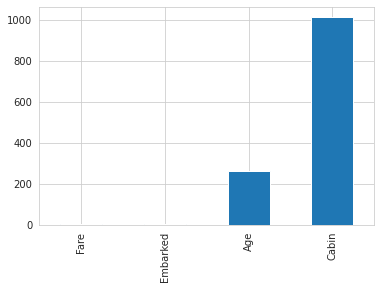

In [228]:
sns.set_style("whitegrid")
missing = df_all.drop('Survived', axis=1).isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

Если с `Embarked` и `Fare` разобраться можно (путем подстановки значений или других способов), то с `Cabin` и `Age` дела обстоят куда сложнее.

### 1 Вариант Age

В этом варианте просто заменим Age средними значениями.

In [229]:
med_age = df_all['Age'].median()
med_age

28.0

In [230]:
df_all['Age'].fillna(med_age, inplace=True)

### Embarked

In [231]:
df_all['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [232]:
df_all['Embarked'].fillna('S', inplace=True)

### Fare

In [233]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [234]:
fare_values = df_all.groupby('Pclass')['Fare'].median()
fare_values

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [235]:
df_all['Fare'].fillna(fare_values[3], inplace=True)

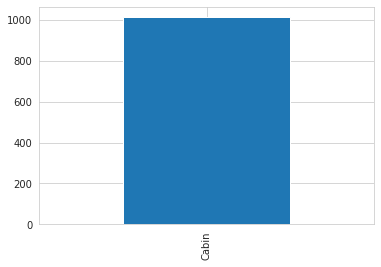

In [236]:
sns.set_style("whitegrid")
missing = df_all.drop('Survived', axis=1).isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

### Cabin

In [237]:
df_all[~df_all.Cabin.isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
10,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783


**Первая** буква в названии кабины - это номер палубы. Весь корабль был разделен на палубы и для соответствующего класса были выделены свои палубы. Однако, естественно, на одной палубе могло быть и несколько классов.

Уберём цифры в номере кабины, поскольку они ничего нам не дают, оставив только номер палубы.

In [238]:
df_all['Cabin'] = df_all[df_all['Cabin'].notnull()]['Cabin'].apply(lambda x: x[:1])

Получим распределение по кабинам и классам билетов у пассажиров. Исходя из полученной таблицы, можно легко заметить, что у палубы `A`, `B` и `C` **первый** класс билетов. В то время как палубы `E` и `D` имеют приблизительно одинаковое количество пассажиров первого класса и немного 2 и 3 класса. Палубы `F` и `G` предусмотрены в основном для **второго** и **третьего** класса.

In [239]:
df_all[df_all['Cabin'].notnull()].groupby(['Cabin', 'Pclass'])['PassengerId'].count()

Cabin  Pclass
A      1         22
B      1         65
C      1         94
D      1         40
       2          6
E      1         34
       2          4
       3          3
F      2         13
       3          8
G      3          5
T      1          1
Name: PassengerId, dtype: int64

Заменим пропущенные значения у столбца `Cabin` буквой, скажем, N (None), чтобы придать ему хоть какой-то класс, так как просто удалить строчки мы не можем.

In [240]:
df_all['Cabin'].fillna('N', inplace=True)

Теперь выясним, какое количество пассажиров с какой палубы выжило, чтоб понять, какая палуба действительно являлась безопасной.

In [241]:
all_decks = df_all.Cabin.value_counts().sort_index()
all_decks

A      22
B      65
C      94
D      46
E      41
F      21
G       5
N    1014
T       1
Name: Cabin, dtype: int64

In [242]:
survived_decks = df_all.groupby('Cabin').Survived.sum().astype(int)
survived_decks

Cabin
A      7
B     35
C     35
D     25
E     24
F      8
G      2
N    206
T      0
Name: Survived, dtype: int64

In [243]:
decks = all_decks.index
decks

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'], dtype='object')

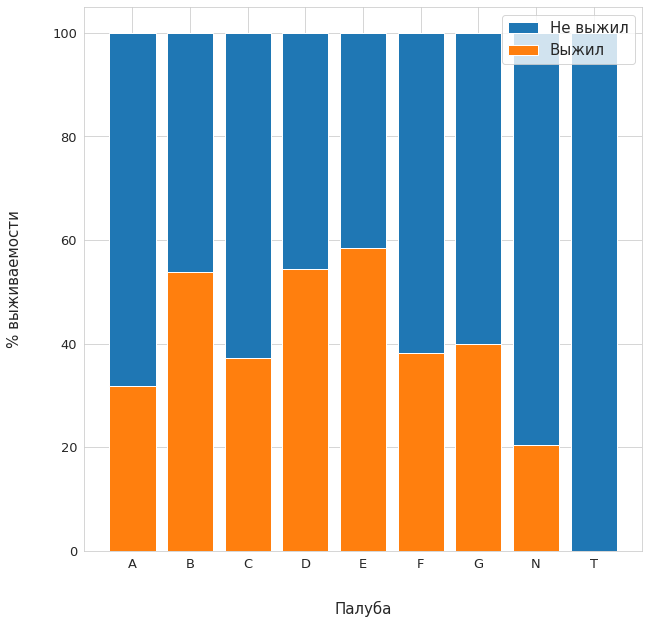

In [244]:
plt.figure(figsize=(10, 10))
plt.bar(decks, 100, label='Не выжил')
plt.bar(decks, survived_decks / all_decks * 100, label='Выжил')
plt.legend(loc='upper right', fontsize=15)
plt.ylabel('% выживаемости', fontsize=15, labelpad=30)
plt.xlabel('Палуба', fontsize=15, labelpad=30)
ax = plt.gca()
ax.tick_params(axis='both', labelsize=13)
plt.show()

Посмотрим, что же значит палуба T и что с ней можно сделать, ведь такой билет всего 1.

In [245]:
df_all[df_all['Cabin'] == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0.0,113784


По стоимости билета (`Fare`) и по классу билета (`Pclass`) вполне можно предположить, что это пассажир высокого класса и отнести его, скажем, к палубе `A`, `B` или `C`. Выберем для него палубу `A`.
Это нужно для того, чтобы сократить количество бесполезных классов в признаке `Cabin`.

In [246]:
index = df_all[df_all['Cabin'] == 'T'].index
df_all.loc[index, 'Cabin'] = 'A'

In [247]:
all_decks = df_all.Cabin.value_counts().sort_index()
all_decks

A      23
B      65
C      94
D      46
E      41
F      21
G       5
N    1014
Name: Cabin, dtype: int64

У нас всё ещё много классов и `N` значительно перевешивает все остальные. Получается слишком смещенная выборка в сторону `N`.

Предположим, что если мы совместим несколько классов, то это увеличит производительность последующей модели. Объединять классы будем на основе проделанной ранее работы. Заметим, что палубы `A`, `B` и `C` ничем практически не отличаются друг от друга и по выживаемости и по классу билетов. Точно так же и с палубами `D`, `E` и `F`, `G`. Более того, эти палубы даже идут последовательно друг за другом на Титанике. А значит, мы просто разделим на б**о**льшие сегменты весь список палуб.

Получим классы `ABC`, `DE`, `FG` и `N`.

In [248]:
df_all['Cabin'].replace(['A', 'B', 'C'], 'ABC', inplace=True)
df_all['Cabin'].replace(['D', 'E'], 'DE', inplace=True)
df_all['Cabin'].replace(['F', 'G'], 'FG', inplace=True)

In [249]:
df_all.Cabin.value_counts()

N      1014
ABC     182
DE       87
FG       26
Name: Cabin, dtype: int64

Вот теперь с обработкой нулевых значений закончили.

In [251]:
df_all.drop('Survived', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        1309 non-null   object 
 2   Embarked     1309 non-null   object 
 3   Fare         1309 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Ticket       1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Рассмотрение зависимостей и нахождение ключевых признаков

Важно помнить, что основная задача в нашем случае - найти ключевые признаки, влияющие на возможность выжить конкретному человеку. Для определения этого факта необходимо рассмотреть зависимости между признаками на простых графиках.

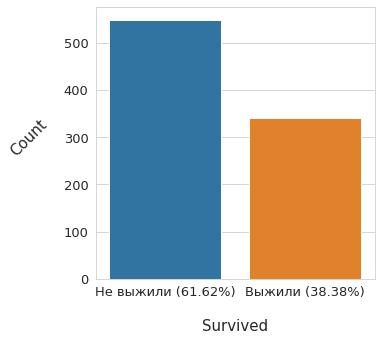

In [96]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['Survived'])
plt.xlabel('Survived', fontsize=15, labelpad=20)
plt.ylabel('Count', fontsize=15, rotation=45, labelpad=30)

survived_count = df_train[df_train['Survived']==1].shape[0]
not_survived_count = df_train[df_train['Survived']==0].shape[0]
all_count = df_train.shape[0]
plt.xticks((0, 1), labels=['Не выжили ({0:.2%})'.format(not_survived_count/all_count), 
                           'Выжили ({0:.2%})'.format(survived_count/all_count)])
plt.tick_params(labelsize=13)

Отсюда можно легко сделать вывод, что большинство пассажиров погибло (62%).

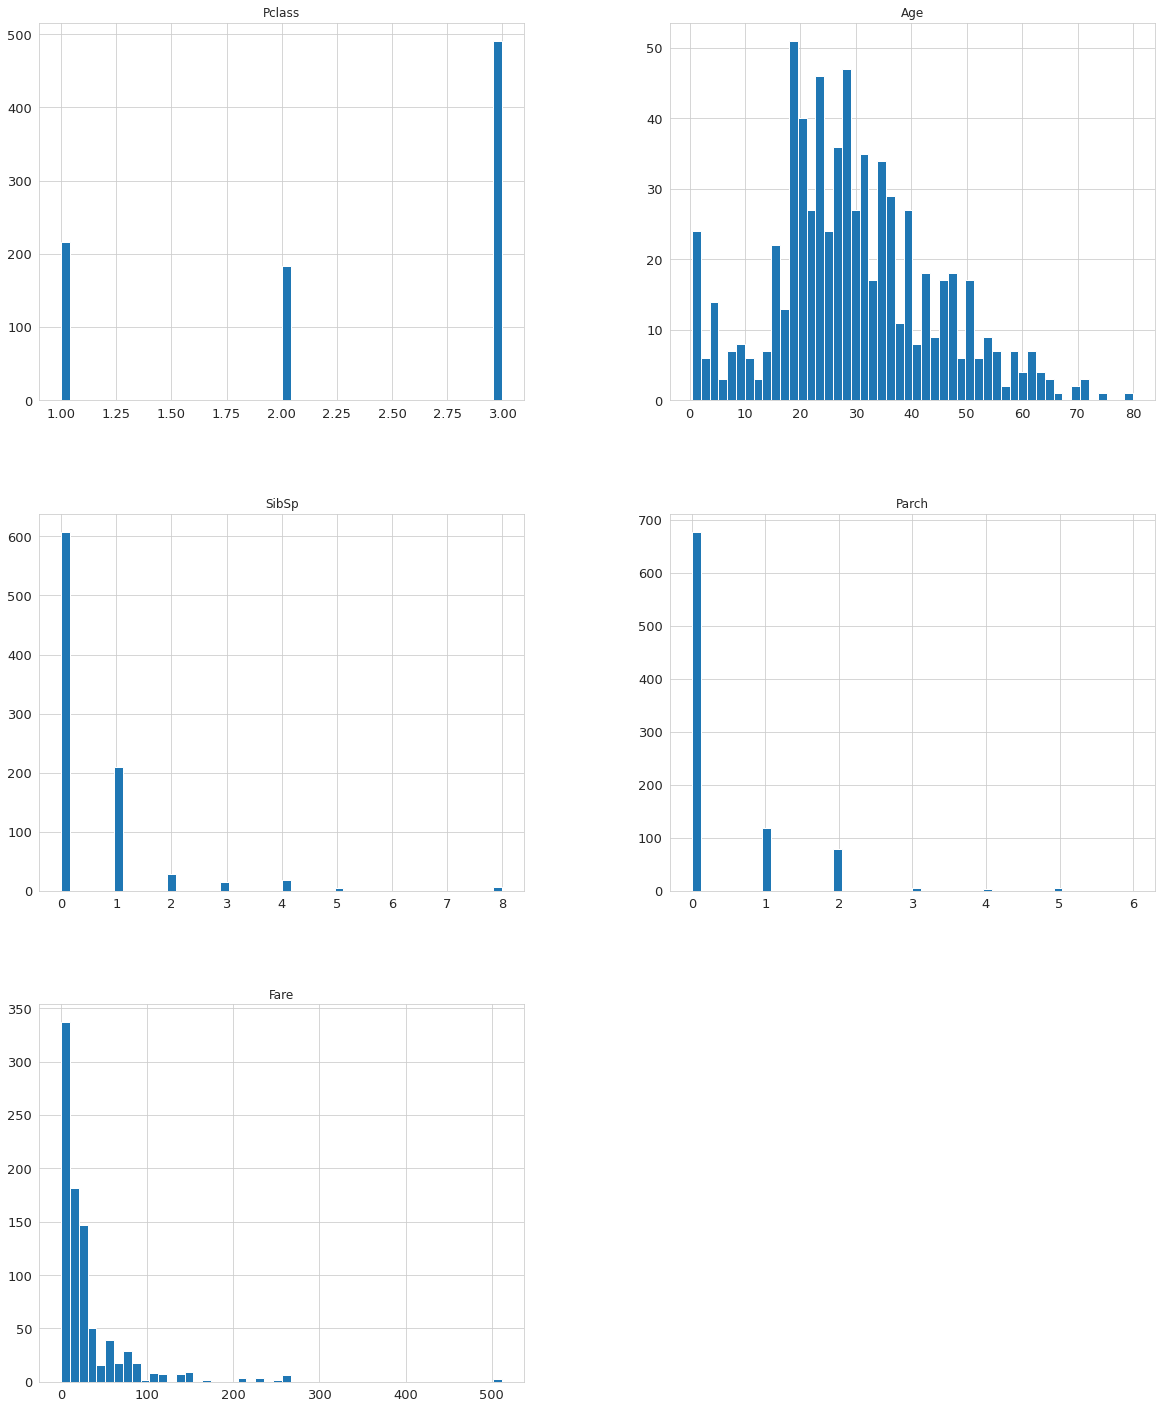

In [111]:
df_train.drop(['PassengerId', 'Survived'], axis=1).hist(bins=50, figsize=(20, 25), xlabelsize=13, ylabelsize=13)
plt.show()

Из графиков выше вполне можно сделать вывод о том, что большинство пассажиров находилось в каютах 3 класса. А также то, что у `Fare` есть явный выбора на отметке 500.

In [7]:
categorial = list(df_train.dtypes[df_train.dtypes == 'object'].index)
quantitative = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

**Категориальные** признаки

In [8]:
categorial

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Количественные** признаки

In [9]:
quantitative

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

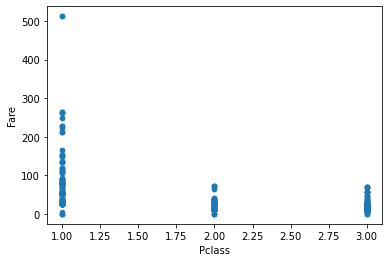

In [17]:
df_train.plot(kind="scatter", x='Pclass' , y='Fare')

In [100]:
trainig_cat_encoded, training_categories = df_train['Sex'].factorize()


In [106]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attributes_names].values

pipeline_categories = Pipeline([
    ('selector', DataFrameSelector(['Cabin', 'Embarked', 'Pclass'])),
    ('onehotencoder', OneHotEncoder(categories='auto'))
])

pipeline_numeric = Pipeline([
    ('selector', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare', 'Sex/class'])),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessing_pipeline = FeatureUnion(transformer_list=[
    ('num_pipe', pipeline_numeric),
    ('cat_pipe', pipeline_categories)
])

In [33]:
df_all.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


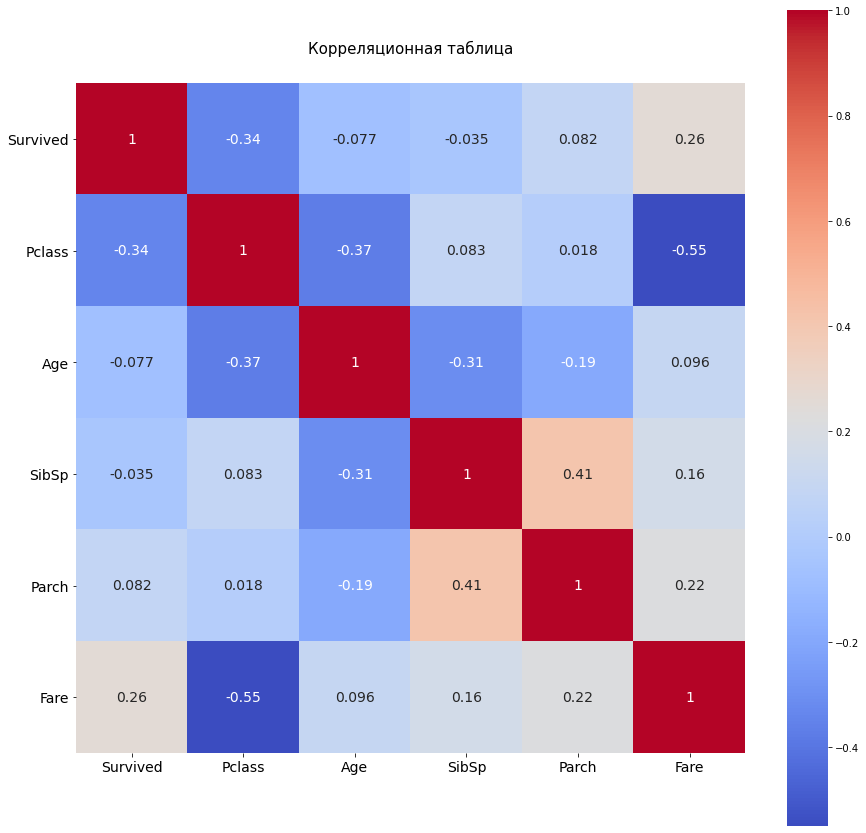

In [60]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

ax.tick_params(axis='x', labelsize=14, labelrotation=0)
ax.tick_params(axis='y', labelsize=14, labelrotation=0)
    
ax.set_title('Корреляционная таблица', size=15, pad=30)

plt.show()

In [97]:
df_train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

**Пропущенные** значения

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [68]:
df_train['Embarked'].mode()

0    S
dtype: object

In [72]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
df_train['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [74]:
df_all["Embarked"] = df_all['Embarked'].fillna('S')

In [76]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1309 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [83]:
df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

7.8542

In [88]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [93]:
pd.qcut(df_all['Age'], 10)

0       (19.0, 22.0]
1       (36.0, 42.0]
2       (25.0, 28.0]
3       (31.0, 36.0]
4       (31.0, 36.0]
            ...     
1304             NaN
1305    (36.0, 42.0]
1306    (36.0, 42.0]
1307             NaN
1308             NaN
Name: Age, Length: 1309, dtype: category
Categories (10, interval[float64]): [(0.169, 14.0] < (14.0, 19.0] < (19.0, 22.0] < (22.0, 25.0] ... (31.0, 36.0] < (36.0, 42.0] < (42.0, 50.0] < (50.0, 80.0]]